<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/Soluci%C3%B3_anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solució analítica que hem d'implementar és:

$T(x,t) = T_c + \sum\limits_{n=1}^{\infty}
\frac{4}{(2n-1)^3\pi^3} \,
(1 - e^{-(2n-1)^2 \pi^2 t}) \,
\sin\!\big[(2n-1)\pi x\big]$

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# 1. CONSTANTS FÍSIQUES
C_v    = 3686.0   # calor específic a volum constant
rho   = 1081.0   # densitat del material
kappa = 0.56     # conductivitat tèrmica
sigma = 0.472    # conductivitat elèctrica
volts = 40.0     # tensió eficaç aplicada


# 2. MAGNITUDS DE NORMALITZACIÓ
N= 101                        #Número de nodes espaials

x_0= 0.02                      #Normalització

x_f = 0.02/x_0                 #Doncs la x final ara normalitzada (0.02 és la long final en m)

alpha = kappa / (C_v * rho)    # difusivitat tèrmica

t_0 = x_0**2 / alpha          # escala característica de temps (ens fa falta per calcular T_0)

P_ext = (volts**2 * sigma) / (2 * x_0**2)

T_0 = (P_ext / (C_v * rho)) * t_0


# 3. CONDICIONS I TEMPS ADIMENSIONAL
T_init = 309.65/T_0  # temperatura de contorn en kelvin normalitzada

t_f = 0.025         # temps adimensional enunciat

N_termes = 1000     #termes del sumatori de la solució analítica

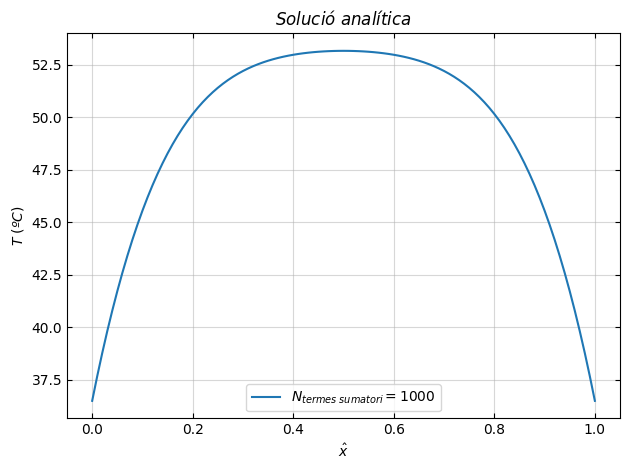

In [18]:
# 4. SOLUCIÓ ANALÍTICA ADIMENSIONAL
def T_analítica(T_init, x, t_f, N_t):
  """
  T_init: float de la temperatura inicial
  x: array dels nodes de x
  t_f: temps final (quan volem evaluar la funció)
  N_t: número de termes al sumatori
  """

  T_i= np.array([T_init]*len(x)) #Convertim la temp. inicial a un array per poder sumar-li l'array que és cada coeficient del sumatori

  for i in range(1, N_t+1):
    T_i+= (4/(np.pi*(2*i-1))**3)*(1.0-np.exp(-((2*i-1)*np.pi)**2*t_f))*np.sin((2*i-1)*np.pi*x) #Terme i-èssim
  return T_i

x_llista= np.linspace(0, x_f, N)    #Creem una llista amb els nodes de x

plt.figure()
plt.plot(x_llista, T_analítica(T_init, x_llista, t_f, N_termes)*T_0-273.15, label=fr"$N_{{termes\ sumatori}} = {N_termes}$")
plt.title(r'$Solució\ analítica$')
plt.xlabel(r"$\hat{x}$")
plt.ylabel(r"$T\ (ºC)$")
plt.grid(True, alpha=0.5)
plt.tick_params(direction="in", top=True, right=True)
plt.legend()
plt.tight_layout()
plt.show()